In [59]:
import matplotlib.pyplot as plt
from astropy.io import ascii
from matplotlib.backends.backend_pdf import PdfPages
from scipy.optimize import curve_fit
import numpy as np
path = "C:/Users/justin/AstrResearch/Astr480/dat_files/"
data_g_mag = ascii.read(path + "g_mag.dat")
data_r_mag = ascii.read(path + "r_mag.dat")
data_i_mag = ascii.read(path + "i_mag.dat")
data_g_int = ascii.read(path + "g_intensity.dat")
data_r_int = ascii.read(path + "r_intensity.dat")
data_i_int = ascii.read(path + "i_intensity.dat")



In [60]:
print(data_i_int)

row  SMA  INTENS INT_ERR PIX_VAR  RMS  ELLIP  ELLIP_ERR   PA  
--- ----- ------ ------- ------- ----- ------ --------- ------
  1   0.0  367.0     0.0   INDEF INDEF  INDEF     INDEF  INDEF
  2  0.52  370.0   0.886    4.52  3.19 0.3155     INDEF -68.22
  3  0.57  370.0   0.947    4.83  3.41 0.3155     INDEF -68.22
  4  0.63  370.0    1.02     5.2  3.67 0.3155     INDEF -68.22
  5  0.69  371.0    1.11    5.64  3.99 0.3155     INDEF -68.22
  6  0.76  371.0    1.21    6.16  4.35 0.3155     INDEF -68.22
  7  0.84  371.0    1.29    6.56  4.64 0.3155     INDEF -68.22
  8  0.92  371.0    1.37    6.96  4.92 0.3155     INDEF -68.22
  9  1.02  371.0    1.45    7.41  5.24 0.3155     INDEF -68.22
 10  1.12  372.0    1.54    7.86  5.56 0.3155     INDEF -68.22
...   ...    ...     ...     ...   ...    ...       ...    ...
 27  5.64  386.0    1.38    10.5  7.41 0.3155     INDEF -68.22
 28  6.21  383.0    1.42    11.4  8.05 0.3155     INDEF -68.22
 29  6.83  376.0    1.53    13.5  9.58 0.1827    0.0661

In [61]:
!pwd

/c/Users/justin/AstrResearch/Astr480


In [62]:
x_g_int = data_g_int["SMA"]  #SMA = Semi Major Axis
y_g_int = data_g_int["INTENS"]
x_r_int = data_r_int["SMA"]
y_r_int = data_r_int["INTENS"]
x_i_int = data_i_int["SMA"]
y_i_int = data_i_int["INTENS"]

In [70]:
y_g_int_h = data_g_int["INTENS"] + data_g_int["INT_ERR"]
y_g_int_l = data_g_int["INTENS"] - data_g_int["INT_ERR"]


In [71]:
y_r_int_h = data_r_int["INTENS"] + data_r_int["INT_ERR"]
y_r_int_l = data_r_int["INTENS"] - data_r_int["INT_ERR"]

In [72]:
y_i_int_h = data_i_int["INTENS"] + data_i_int["INT_ERR"]
y_i_int_l = data_i_int["INTENS"] - data_i_int["INT_ERR"]

In [66]:
def app_mag(radius , intensity , wavelength_A):   # wavelength_A changes values during the calculation 
                                                  # but doesn't change the final result. Cannot be 0
    gain = 1.25   # e/ADU; for ARCSAT CCD
    time = 300   # in seconds; this is the exposure time
    area = (0.25 ** 2) * 3.1415   # in m^2; for ARCSAT lens
    c = 2.998 * 10 ** 8   # speed of light m/s
    h = 6.626 * 10 ** -34   # Planc's constant SI units
    wavelength_m = wavelength_A * 10 ** -10   # assumes wavelength in Angstroms, converts into meters
    frequency = c/wavelength_m   # frequency in Hz
    E_photon = h * frequency * 10 ** 7   # in ergs; 10 ** 7 converts joules into ergs
    
    
    amt_photons = 0
    for i in range(0, len(radius) - 1):
        delx = np.abs(radius[i] - radius[i + 1])
        #mp = 3.14 * ((intensity[i] + intensity[i + 1])/2) ** 2
        mp = 2 * 3.14 * ((radius[i] + radius[i + 1])/2) * ((intensity[i] + intensity[i + 1])/2)
        amt_photons = delx * mp + amt_photons
        
    
    convert_to_jansky = 10 ** 19 # converts erg/(m^2 * s * Hz) into Jansky
    spec_flux_density = (E_photon * amt_photons * gain * convert_to_jansky) / (time * area * frequency)
    flux_vega = 3631  # in Janskys
    mag = -2.5 * np.log10(spec_flux_density/flux_vega)
    return mag

In [74]:
print("g upper" , app_mag(x_g_int , y_g_int_h , 1))
print("g lower" , app_mag(x_g_int , y_g_int_l , 1))
print("r upper" , app_mag(x_r_int , y_r_int_h , 1))
print("r lower" , app_mag(x_r_int , y_r_int_l , 1))
print("i upper" , app_mag(x_i_int , y_i_int_h , 1))
print("i lower" , app_mag(x_i_int , y_i_int_l , 1))

g upper 15.6037439118
g lower 15.6229243826
r upper 17.9041107062
r lower 17.9147446599
i upper 17.5470133337
i lower 17.5563658617


In [76]:
print("g err" , app_mag(x_g_int , y_g_int_h , 1) - app_mag(x_g_int , y_g_int , 1))

print("r err" , app_mag(x_r_int , y_r_int_h , 1) - app_mag(x_r_int , y_r_int , 1))

print("i err" , app_mag(x_i_int , y_i_int_h , 1) - app_mag(x_i_int , y_i_int , 1))


g err -0.00954788100126
r err -0.00530395795689
i err -0.00466619366805


In [67]:
app_mag(x_g_int , y_g_int , 1)

15.613291792830591

In [68]:
app_mag(x_r_int , y_r_int , 1)

17.909414664196348

In [69]:
app_mag(x_i_int , y_i_int , 1)

17.551679527404985

In [ ]:
14.192620570156858

In [66]:
total = 0
gain = 1.25
time = 300
E_photon = 4.164 * 10 ** -12 # in ergs
freq = 6.285 * 10 ** 14 # in hz
area = 0.25 * 3.1415
for i in range(0, len(x_g_int) - 1):
    delx = np.abs(x_g_int[i] - x_g_int[i + 1])
    mp = 3.14 * ((y_g_int[i] + y_g_int[i + 1])/2) ** 2
    total = delx * mp + total
result = (E_photon * total * gain) / (time * area * freq)
flux = result * 10 ** 19
flux_vega = 3631

In [67]:
mag = -2.5 * np.log10(flux/flux_vega)

In [68]:
print(mag)

14.192735552


In [69]:
#14.67 

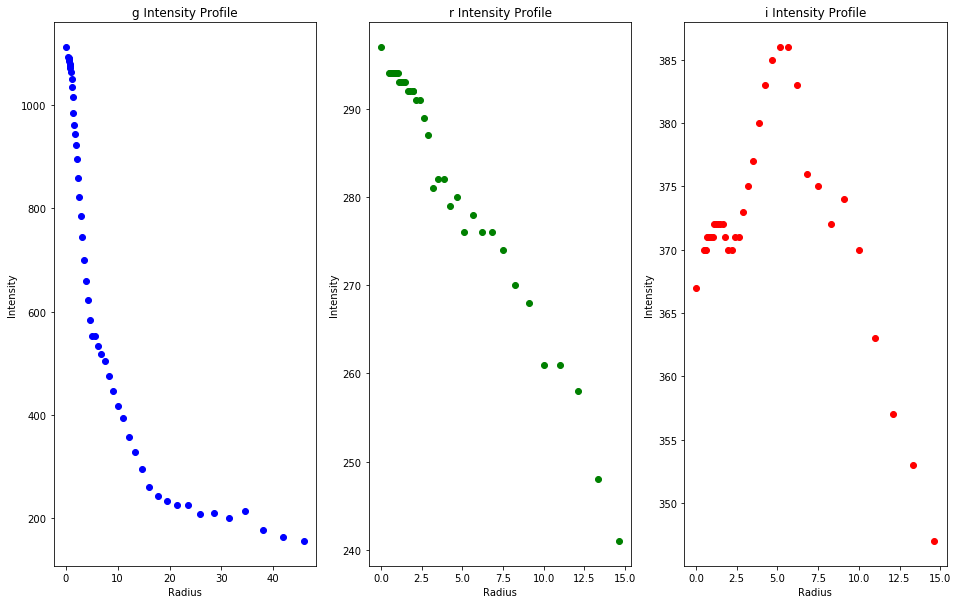

In [70]:
fig, ax = plt.subplots(1 , 3)
fig.set_size_inches(16,10)

ax[0].scatter(x_g_int , y_g_int , c = "blue")
#ax[0].set_ylim(-5.3,-7.7)
#ax[0].set_xlim(0.8,2.7)
ax[0].set_title("g Intensity Profile")
ax[0].set_xlabel("Radius")
ax[0].set_ylabel("Intensity")



ax[1].scatter(x_r_int , y_r_int , c = "green")
#ax[1].set_ylim(-5.9,-6.2)
#ax[1].set_xlim(0.7,2.0)
ax[1].set_title("r Intensity Profile")
ax[1].set_xlabel("Radius")
ax[1].set_ylabel("Intensity")


ax[2].scatter(x_i_int , y_i_int , c = "red")
#ax[2].set_ylim(-6.3,-6.5)
#ax[2].set_xlim(0.7,2.0)
ax[2].set_title("i Intensity Profile")
ax[2].set_xlabel("Radius")
ax[2].set_ylabel("Intensity")


"================================"

"""ax[0,1].scatter(x_g , y_g , c = "blue")
ax[0,1].set_ylim(-5.3,-7.7)
ax[0,1].set_xlim(0.8,2.7)
ax[0,1].set_title("g brightness profile")
ax[0,1].set_xlabel("pixel ** 1/4")
ax[0,1].set_ylabel("Absolute Magnitude")


ax[1,1].scatter(x_r , y_r , c = "green")
ax[1,1].set_ylim(-5.9,-6.2)
ax[1,1].set_xlim(0.7,2.0)
ax[1,1].set_title("r brightness profile")
ax[1,1].set_xlabel("pixel ** 1/4")
ax[1,1].set_ylabel("Absolute Magnitude")


ax[2,1].scatter(x_i , y_i , c = "red")
ax[2,1].set_ylim(-6.3,-6.5)
ax[2,1].set_xlim(0.7,2.0)
ax[2,1].set_title("i brightness profile")
ax[2,1].set_xlabel("pixel ** 1/4")
ax[2,1].set_ylabel("Absolute Magnitude")
"""
plt.savefig("Intensity Profiles.jpg")
plt.show()



In [ ]:
c = 22.5
x_g = data_g_mag["RSMA"]
y_g = data_g_mag["MAG"] + c
x_r = data_r_mag["RSMA"]
y_r = data_r_mag["MAG"] + c
x_i = data_i_mag["RSMA"]
y_i = data_i_mag["MAG"] + c

"=========================================================="




In [ ]:
fig, ax = plt.subplots(3 , 1)
fig.set_size_inches(8,24)

ax[0].scatter(x_g , y_g , c = "blue")
ax[0].set_ylim(-5.3 + c,-7.7 + c)
#ax[0].set_xlim(0.8,2.7)
ax[0].set_title("g brightness profile")
ax[0].set_xlabel("radius ** 1/4")
ax[0].set_ylabel("Absolute Magnitude")


ax[1].scatter(x_r , y_r , c = "green")
ax[1].set_ylim(-5.9 + c,-6.2 + c)
ax[1].set_xlim(0.7,2.0)
ax[1].set_title("r brightness profile")
ax[1].set_xlabel("radius ** 1/4")
ax[1].set_ylabel("Absolute Magnitude")


ax[2].scatter(x_i , y_i , c = "red")
ax[2].set_ylim(-6.3 + c,-6.5 + c)
ax[2].set_xlim(0.7,2.0)
ax[2].set_title("i brightness profile")
ax[2].set_xlabel("radius ** 1/4")
ax[2].set_ylabel("Absolute Magnitude")


plt.show()